<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/try/opencv%2Btesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p /content/tessdata/
!cp /content/num2.traineddata /content/tessdata/

In [3]:
import os
os.environ["TESSDATA_PREFIX"] = "/content/tessdata/"

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


None
辨識結果:
ARE778


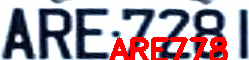

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
ARE728


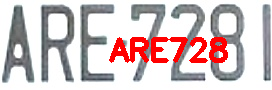

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
BNT6302


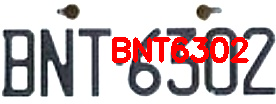

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
BKY7610


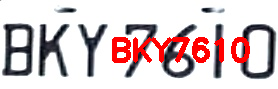

辨識結果:
BKY7610


<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


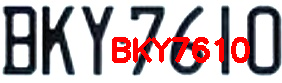

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
BNT6302


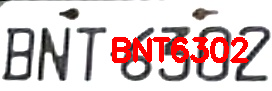

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
ATC9706


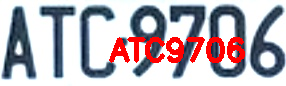

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
ARE7Z8


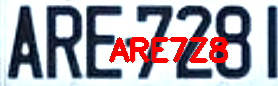

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
ATC9706


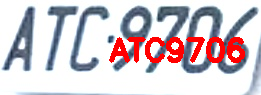

<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
ARE728I


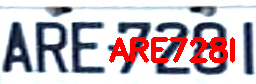

辨識結果:
ARE728


<ipython-input-87-1701c84013d6>:97: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


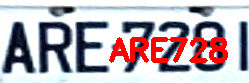

In [87]:
import cv2
from google.colab.patches import cv2_imshow
import PIL
import glob
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
# !apt install tesseract-ocr
# !apt install libtesseract-dev
# !pip install pytesseract
# !pip install pillow
# import pytesseract
#照片路徑
files=glob.glob('/content/drive/MyDrive/small_plates/*.jpg')
def photo_resize(img,target_width,target_height):
  # 調整圖片大小
  re_img=cv2.resize(img, (target_width, target_height))
  return re_img
#調整亮度與對比度
def adjusted(img,x,y):
  alpha = x
  beta = y

  adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

  return adjusted_image

def Sobel(img):
  Sobelx=cv2.Sobel(img,cv2.CV_32F,1,0)
  Sobelx=cv2.convertScaleAbs(Sobelx)
  return Sobelx

def Gussian(img):
  kernel_size = (1, 1)  # 高斯和大小 通常奇數
  sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算
  # 高斯濾波器
  blurred_img = cv2.GaussianBlur(img, kernel_size, sigma_x)
  return blurred_img
def threshold(img):
  thr, binary = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
  return binary
def contours(img):
  contours1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
  contours = contours1[0]   #取得輪廓
  # cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
  letters=[]
  for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    # if 15<h<90: #要改的參數!!!10<h<100
    if 15<h<90: #要改的參數!!!10<h<100
      letters.append(contour)
  # cv2.drawContours(contours_img, letters, -1, (255, 0, 0), 2)
  # cv2_imshow(contours_img)
  #找出最小x跟最大x
  min_x =float('inf')#正無窮
  max_x =0
  for letter in letters:
    for point in letter:
      x=point[0][0]
      min_x=min(min_x,x)
      max_x=max(max_x,x)
  return min_x,max_x
#image[y:h,x:w]
def cropped(img,x,y,h,w):
  cropped_img=img[y:h,x:w]

  return cropped_img

def erope(img):
  kernel=np.ones((3, 3),np.uint8)
  ero=cv2.erode(img,kernel,iterations=1)
  return ero

def dilate(img):
  kernel=np.ones((2, 7),np.uint8)
  dilation=cv2.dilate(img,kernel,iterations=9)
  return dilation

def findcontour(img):
  contours1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
  contours = contours1[0]   #取得輪廓
  points=None
  min_contour_length = 2500

  # 遍歷所有輪廓
  for contour in contours:
      # 計算輪廓的面積
      area = cv2.contourArea(contour)

      # 如果輪廓的面積大於2500，繪製最小外接矩形
      if area >= min_contour_length:
          # 計算輪廓的最小外接矩形
          rect = cv2.minAreaRect(contour)
          angle=rect[2]
          points = cv2.boxPoints(rect)
          points = np.int0(points)
          break

  if points is not None:
    if angle>=0:
      sorted_points = sorted(points, key=lambda x: x[0])
      bottom_left=sorted_points[0]
      top_left=sorted_points[1]
      bottom_right=sorted_points[2]
      top_right=sorted_points[3]

      return bottom_left,top_left,bottom_right,top_right
    else:
      sorted_points = sorted(points, key=lambda x: x[0])
      top_left=sorted_points[0]
      bottom_left=sorted_points[1]
      top_right=sorted_points[2]
      bottom_right=sorted_points[3]

      return bottom_left,top_left,bottom_right,top_right
  else:
    return 0,0,0,0

def affine(img,bottom_left,top_left,bottom_right,top_right):
  p1 = np.float32([(top_left),(top_right),(bottom_right)])
  p2 = np.float32([[top_left[0],top_right[1]],(top_right),(bottom_right)])
  M = cv2.getAffineTransform(p1, p2)

  h,w=adj_img.shape[:2]

  output = cv2.warpAffine(adj_img, M,(w,h))

  x=0
  y=min(top_right[1],bottom_right[1])
  h=abs(bottom_right[1]-top_right[1])

  output=output[y-5:y+h,x:x+w]
  # output=adjusted(output,-1.5,15)
  # output=adjusted(output,-1.3,12)
  output=adjusted(output,-1.5,15)
  if output is not None:
    # output = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
    # thr, output = cv2.threshold(output,127, 255, cv2.THRESH_BINARY)
    cv2.imwrite('output.jpg',output)
  else:
    print('None')
    pass

def tesseracttt(img):

  config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789. --oem 3 --psm 6'
  text = pytesseract.image_to_string(img,lang='eng',config=config)
  if len(text) ==1:
    print('辨識失敗')
  else:
    clean_text = text.strip()#去除兩端不可見字符
    print('辨識結果:\n{}'.format(clean_text))
    img=cv2.imread(img)
    cv2.putText(img, clean_text, (int(110), int(60)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    cv2_imshow(img)
for file in files:
  img=cv2.imread(file)
  #調整圖片大小
  # img=photo_resize(img,300,136)
  img=photo_resize(img,300,136)
  #調整圖片亮度與對比度
  adj_img=adjusted(img,-1.5,15)
  #灰階
  gray_img = cv2.cvtColor(adj_img,cv2.COLOR_BGR2GRAY)
  #索伯
  Sobelx=Sobel(gray_img)
  #高斯模糊
  blur_img=Gussian(Sobelx)
  #二值化
  binary=threshold(blur_img)
  # cv2_imshow(binary)
  # plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
  # plt.axis('off')
  # plt.show()
  #找出輪廓
  min_x,max_x=contours(binary)
  #車牌框裁切
  cropped_img=cropped(binary,min_x,0,binary.shape[0],max_x)
  #侵蝕
  ero_img=erope(cropped_img)
  #膨脹
  dilate_img=dilate(ero_img)
  # cv2_imshow(dilate_img)
  #找出最小四邊形輪廓
  bottom_left,top_left,bottom_right,top_right=findcontour(dilate_img)
  # out_img=tesseract(output)

  adj_img=cropped(adj_img,min_x,0,img.shape[0],max_x)
  # cv2_imshow(adj_img)
  #訪設變換
  affine(adj_img,bottom_left,top_left,bottom_right,top_right)
  # cv2.imwrite('output.jpg',output)
  #字元辨識
  tesseracttt('output.jpg')


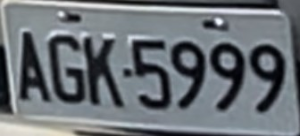

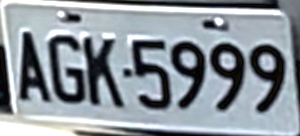

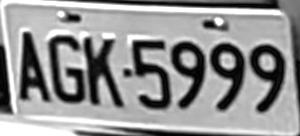

In [64]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/drive/MyDrive/plates/AGK5999.jpg')
# 目標大小 (寬, 高)
target_width = 300
target_height = 136

# 調整圖片大小
image = cv2.resize(image, (target_width, target_height))
# # 調整亮度和對比度
alpha =-1.5
beta = 20
# alpha = -1.0
# beta = 10
img=image.copy()
adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
# 顯示原始圖片和調整後的圖片
cv2_imshow(image)
cv2_imshow(adjusted_image)
image=adjusted_image.copy()
# 轉灰階
from google.colab.patches import cv2_imshow
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
# #高斯濾波器
# kernel_size = (11, 11)  # 高斯和大小 通常奇數
# sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算
# blurred_image = cv2.GaussianBlur(gray_image, kernel_size, sigma_x)
# cv2_imshow(blurred_image)

#Sobel

#只取垂直邊緣

#高斯濾波器

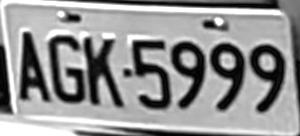

In [65]:
kernel_size = (1,1)  # 高斯和大小 通常奇數
sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算

# 高斯濾波器
blurred_image = cv2.GaussianBlur(gray_image, kernel_size, sigma_x)
cv2_imshow(blurred_image)

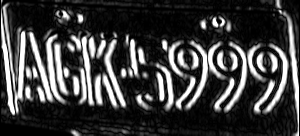

In [66]:
import cv2
Sobelx=cv2.Sobel(blurred_image,cv2.CV_32F,1,0)
Sobely=cv2.Sobel(blurred_image,cv2.CV_32F,0,1)
Sobelx=cv2.convertScaleAbs(Sobelx)
Sobely=cv2.convertScaleAbs(Sobely)
Sobelxy=cv2.addWeighted(Sobelx,0.5,Sobely,0.5,0)
cv2_imshow(Sobelx)


#二值化

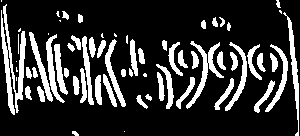

In [67]:
thr, binary = cv2.threshold(Sobelx,127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary)

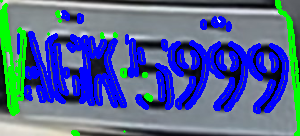

18
287


In [68]:
contours1 = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
contours = contours1[0]   #取得輪廓
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
letters=[]
for contour in contours:
  x,y,w,h=cv2.boundingRect(contour)
  if 8<h<90: #要改的參數!!!10<h<100
    letters.append(contour)
cv2.drawContours(img, letters, -1, (255, 0, 0), 2)
cv2_imshow(img)
#找出最大x跟最小x
min_x =float('inf')#正無窮
max_x =0
for letter in letters:
  for point in letter:
    x=point[0][0]
    min_x=min(min_x,x)
    max_x=max(max_x,x)

print(min_x)
print(max_x)


In [ ]:
print(binary.shape[0])

136


In [69]:
#裁切照片
cropped_img=binary[0:binary.shape[0],min_x:max_x]
cropped_image=image[0:binary.shape[0],min_x:max_x]

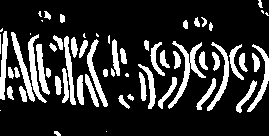

In [70]:
cv2_imshow(cropped_img)

#侵蝕

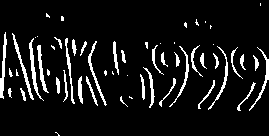

In [71]:
import numpy as np
kernel=np.ones((3, 3),np.uint8)
ero=cv2.erode(cropped_img,kernel,iterations=1)
cv2_imshow(ero)

#膨脹

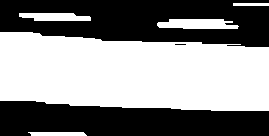

In [72]:
import numpy as np
kernel=np.ones((1, 7),np.uint8)
dilation=cv2.dilate(ero,kernel,iterations=9)
cv2_imshow(dilation)

<ipython-input-73-af1f33e99c59>:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


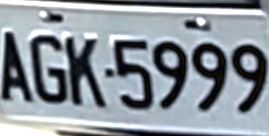

In [73]:
contours1 = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
contours = contours1[0]   #取得輪廓

min_contour_length = 2500

# 遍歷所有輪廓
for contour in contours:
    # 計算輪廓的面積
    area = cv2.contourArea(contour)

    # 如果輪廓的面積大於2500，繪製最小外接矩形
    if area >= min_contour_length:
        # 計算輪廓的最小外接矩形
        rect = cv2.minAreaRect(contour)
        points = cv2.boxPoints(rect)
        points = np.int0(points)

        # 繪製最小外接矩形
        # cv2.drawContours(cropped_image, [points], 0, (255, 255, 0), 2)
cv2_imshow(cropped_image)
# # 繪製最小外接矩形
# cv2.drawContours(cropped_image, [points], 0, (0, 0, 255), 2)

#最大邊緣

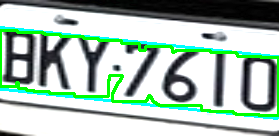

<ipython-input-88-a5a3438a1b17>:32: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


array([[[ 51,  50,  48],
        [ 56,  52,  51],
        [ 58,  56,  54],
        ...,
        [126, 126, 126],
        [124, 124, 124],
        [124, 124, 124]],

       [[ 39,  36,  34],
        [ 40,  39,  38],
        [ 44,  39,  38],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[ 18,  15,  14],
        [ 16,  14,  12],
        [ 15,  12,  10],
        ...,
        [ 33,  33,  33],
        [ 34,  34,  34],
        [ 38,  38,  38]],

       ...,

       [[  6,  12,  14],
        [  6,  12,  12],
        [  4,  10,  10],
        ...,
        [ 68,  66,  66],
        [ 63,  60,  60],
        [ 57,  54,  54]],

       [[  6,  10,  12],
        [  4,   9,   9],
        [  2,   6,   8],
        ...,
        [ 72,  69,  69],
        [ 69,  68,  68],
        [ 68,  64,  64]],

       [[  6,   9,  10],
        [  3,   6,   8],
        [  0,   4,   6],
        ...,
        [ 74,  70,  70],
        [ 74,  70,  70],
        [ 75,  72,  72]]], dtype=uint8)
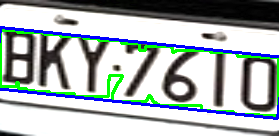

In [ ]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 定義最大邊緣距離

min_contour_length = 200

# 篩選出長度大於最小長度的邊緣
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, True) > min_contour_length]
# 定義最大邊緣距離
max_edge_distance = float('inf')
nearest_contours = []

# 找出最近的邊緣
for i, cnt1 in enumerate(filtered_contours):
    min_distance = max_edge_distance
    nearest_contour = None
    for j, cnt2 in enumerate(contours):
        if i != j:
            distance = cv2.matchShapes(cnt1, cnt2, cv2.CONTOURS_MATCH_I2, 0)
            if distance < min_distance:
                min_distance = distance
                nearest_contour = cnt2
    if nearest_contour is not None:
        nearest_contours.append(cnt1)

# 將所有最近的邊緣連接成一條線
combined_contours = np.concatenate(nearest_contours)
cv2.drawContours(cropped_image, [combined_contours], -1, (0, 255, 0), 2)
cv2_imshow(cropped_image)
# 找到最小外接矩形
rect = cv2.minAreaRect(combined_contours)
points = cv2.boxPoints(rect)
points = np.int0(points)

# 繪製最小外接矩形
cv2.drawContours(cropped_image, [points], 0, (0, 0, 255), 2)

#四角

In [78]:
sorted_points = sorted(points, key=lambda x: x[0])
bottom_left=sorted_points[0]
top_left=sorted_points[1]
bottom_right=sorted_points[2]
top_right=sorted_points[3]


In [75]:
sorted_points = sorted(points, key=lambda x: x[0])
top_left=sorted_points[0]
bottom_left=sorted_points[1]
top_right=sorted_points[2]
bottom_right=sorted_points[3]


#仿射變換

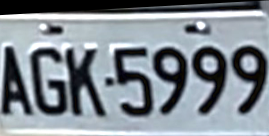

True

In [79]:
# Read the uploaded image
# img = cv2.imread('adjusted_image.jpg')
# img=adjusted_image

# x=math.sqrt((bottom_right[0]-bottom_left[0])**2+(bottom_right[1]-bottom_left[1])**2)
# y=math.sqrt((top_right[0]-bottom_right[0])**2+(top_right[1]-bottom_right[1])**2)
p1 = np.float32([(top_left),(top_right),(bottom_right)])
p2 = np.float32([[top_left[0],top_right[1]],(top_right),(bottom_right)])
M = cv2.getAffineTransform(p1, p2)
h,w=cropped_image.shape[:2]
output = cv2.warpAffine(cropped_image, M,(w,h))

cv2_imshow(output)
cv2.imwrite('output.jpg',output)

0 45 71 269


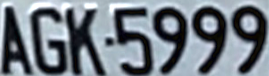

True

In [80]:
x=0
y=top_right[1]
h=bottom_right[1]-top_right[1]
output=output[y-5:y+h,x:x+w]
print(x,y,h,w)
cv2.imwrite('output.jpg', output)
# # cv2_imshow(output)
# gray_img = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
# thr, output = cv2.threshold(gray_img,127, 255, cv2.THRESH_BINARY)
cv2_imshow(output)
cv2.imwrite('output.jpg', output)

In [ ]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install pillow
import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (1,976 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [81]:
config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789. --oem 3 --psm 6'
text = pytesseract.image_to_string('/content/output.jpg',lang='eng',config=config)
if len(text) ==1:
  print('辨識失敗')
else:
  clean_text = text.strip()#去除兩端不可見字符
  print('辨識結果:\n{}'.format(clean_text))

辨識結果:
AGK5999


array([[[190, 187, 173],
        [191, 188, 174],
        [192, 189, 175],
        ...,
        [184, 176, 163],
        [185, 177, 164],
        [193, 186, 171]],

       [[190, 187, 173],
        [192, 189, 175],
        [199, 196, 182],
        ...,
        [186, 178, 165],
        [186, 178, 165],
        [193, 186, 171]],

       [[198, 192, 179],
        [201, 195, 182],
        [214, 208, 195],
        ...,
        [188, 181, 166],
        [187, 180, 165],
        [194, 187, 172]],

       ...,

       [[158, 152, 147],
        [143, 137, 132],
        [124, 117, 114],
        ...,
        [197, 188, 174],
        [199, 190, 176],
        [205, 193, 181]],

       [[170, 167, 159],
        [165, 162, 154],
        [157, 151, 146],
        ...,
        [196, 187, 174],
        [199, 190, 177],
        [204, 192, 180]],

       [[183, 180, 172],
        [183, 180, 172],
        [182, 176, 171],
        ...,
        [195, 186, 173],
        [197, 188, 175],
        [203, 191, 179]]], dtype=uint8)
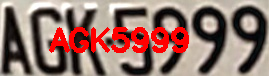

In [82]:
out_image = cv2.imread('/content/output.jpg')
cv2.putText(out_image, clean_text, (int(50), int(50)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)